In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [560]:
iris = load_iris()
iris.data
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [561]:
df['target'] = iris.target

df['Flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Import Mimaxscaler for Preprocessing of Data

In [562]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[['sepal length (cm)']])
# df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])
# scaler.fit(df[['sepal width (cm)']])
# df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])
# scaler.fit(df[['petal length (cm)']])
# df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
# scaler.fit(df[['petal width (cm)']])
# df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
# df.head()

In [563]:
df1 = df[df['target']==0]
df2 = df[df['target']==1]
df3 = df[df['target']==2]

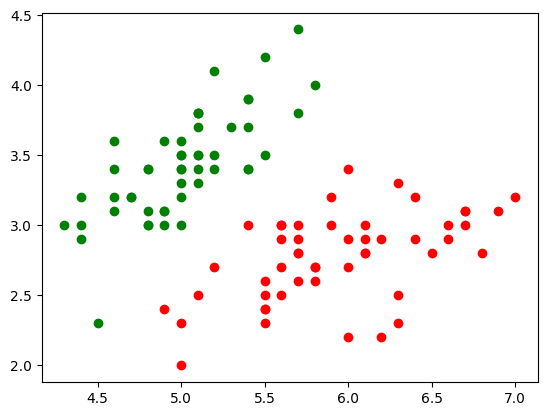

In [564]:
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],c='red')
# plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],c='blue')


In [565]:
x = df.drop(['target','Flower_name'],axis='columns')
y = df['target']

In [566]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [567]:
len(x_train)

120

In [568]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [569]:
knn.score(x_test, y_test)


1.0

In [570]:
yp = knn.predict(x_test)

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,yp)

Text(33.22222222222222, 0.5, 'Actual')

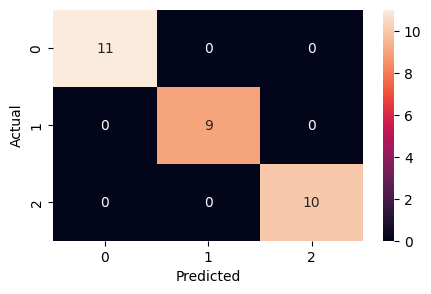

In [571]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [572]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

